In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg=VGG16()
vgg.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 185s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 11

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fm = keras.datasets.fashion_mnist
(trnImg, trnLbl), (tstImg, tstLbl) = fm.load_data()

In [7]:
classNames = ['T-shirt','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [10]:
print(trnImg.shape, trnLbl.shape)
print(tstImg.shape, tstLbl.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


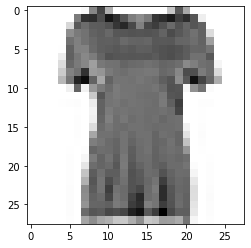

In [14]:
plt.figure()
plt.imshow(trnImg[10], 'Greys')

In [16]:
trnImg = trnImg/255.0
tstImg = tstImg/255.0

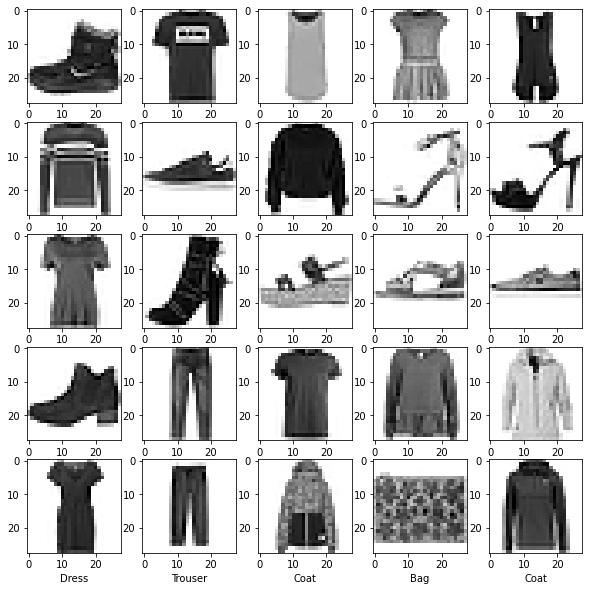

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(trnImg[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trnLbl[i]])

In [25]:
trnImg.shape
trnImg = trnImg.reshape(-1,28,28,1)
tstImg = tstImg.reshape(-1,28,28,1)

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(256, (2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(512, (2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 256)       

In [77]:
#모델 학습 설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [78]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', patience=20)

In [79]:
history = model.fit(trnImg, trnLbl, validation_split=0.2,
                         epochs=100, batch_size=128, callbacks=[es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 16s 341us/sample - loss: 0.2975 - acc: 0.8895 - val_loss: 0.2777 - val_acc: 0.8978
Epoch 2/100
48000/48000 [==============================] - 16s 331us/sample - loss: 0.2833 - acc: 0.8954 - val_loss: 0.2695 - val_acc: 0.8982
Epoch 3/100
48000/48000 [==============================] - 16s 330us/sample - loss: 0.2702 - acc: 0.8988 - val_loss: 0.2535 - val_acc: 0.9062
Epoch 4/100
48000/48000 [==============================] - 16s 330us/sample - loss: 0.2617 - acc: 0.9024 - val_loss: 0.2579 - val_acc: 0.9046
Epoch 5/100
48000/48000 [==============================] - 16s 329us/sample - loss: 0.2579 - acc: 0.9024 - val_loss: 0.2421 - val_acc: 0.9112
Epoch 6/100
48000/48000 [==============================] - 16s 329us/sample - loss: 0.2470 - acc: 0.9074 - val_loss: 0.2458 - val_acc: 0.9058
Epoch 7/100
48000/48000 [==============================] - 16s 331us/sample - loss: 0.2426 - acc: 

In [81]:
model.evaluate(tstImg, tstLbl)

10000/10000 [==============================] - 2s 167us/sample - loss: 0.2570 - acc: 0.9182


[0.25703640514612197, 0.9182]

# 다른것

In [82]:
from PIL import Image

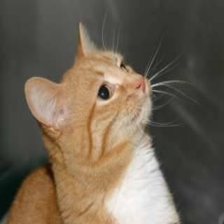

In [111]:
img = Image.open(r"Q:\Python_Data\dogs-vs-cats\train\cat.5259.jpg").resize((224,224))
img

In [103]:
np.array(img).shape

(224, 224, 3)

In [104]:
img_ = np.array(img).reshape(-1,224,224,3)
yhat = vgg.predict(img_)
yhat

array([[2.11313886e-06, 2.41500733e-04, 5.34658056e-06, 2.30212627e-05,
        1.32921459e-05, 1.37449533e-04, 4.41735574e-06, 2.04561529e-05,
        4.19029857e-05, 4.51321575e-05, 5.50512641e-06, 1.03300147e-06,
        1.86739589e-06, 4.38586858e-06, 2.92333971e-05, 1.59182073e-05,
        1.51528070e-06, 4.23723104e-04, 1.19440540e-06, 4.98735062e-06,
        6.95490553e-06, 7.06573992e-05, 3.94417930e-06, 2.61287350e-05,
        2.67513933e-05, 3.72228242e-05, 5.08548750e-04, 2.80892826e-04,
        1.24823651e-04, 7.45292637e-04, 2.65191775e-05, 1.17104544e-04,
        2.01003844e-04, 5.45816401e-05, 3.78043158e-04, 6.86805070e-05,
        1.49908825e-03, 1.94106342e-05, 1.77310035e-03, 2.18406017e-03,
        4.77573805e-04, 8.80786218e-04, 3.28612817e-03, 1.59774383e-04,
        1.18710985e-03, 7.83821233e-05, 1.09129613e-02, 6.56058721e-04,
        5.76723032e-05, 4.02012711e-06, 8.12611688e-06, 1.84485634e-05,
        4.09026907e-05, 5.48134267e-06, 2.88245064e-05, 1.024606

In [106]:
np.argmax(yhat)

356

In [107]:
labelIdx = np.argmax(yhat)

In [108]:
decode_predictions(yhat)

40960/35363 [==================================] - 0s 1us/step


[[('n02441942', 'weasel', 0.2551687),
  ('n02124075', 'Egyptian_cat', 0.24794737),
  ('n02808304', 'bath_towel', 0.23055474),
  ('n02442845', 'mink', 0.018269844),
  ('n04254777', 'sock', 0.015518701)]]

In [112]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

# img_path = 'r"Q:\Python_Data\dogs-vs-cats\train\cat.5259.jpg"'
# img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02124075', 'Egyptian_cat', 0.34084463), ('n02123045', 'tabby', 0.09744891), ('n02123159', 'tiger_cat', 0.08095271)]
